In [1]:
# Acea Smart Water Analytics with ML/DL - Ongoing
# Dataset: https://www.kaggle.com/c/acea-water-prediction/data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# Load Lake Bilancino data into pandas DataFrame
data_lb =  pd.read_csv("Lake_Bilancino.csv")
print(data_lb.info())
display(data_lb.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB
None


,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [3]:
# Load River Arno data into pandas DataFrame
data_ra =  pd.read_csv("River_Arno.csv")
print(data_ra.info())
display(data_ra.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88


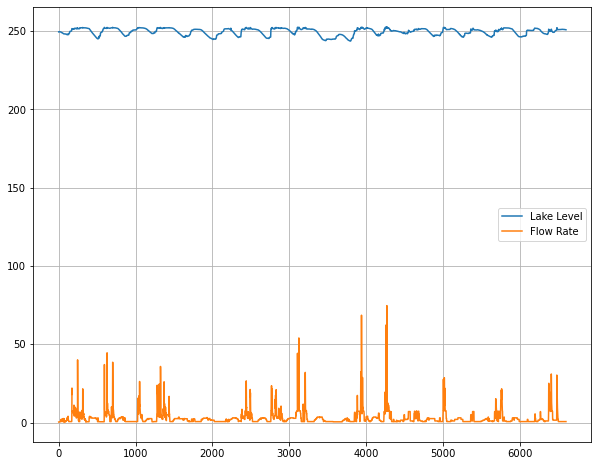

In [4]:
plt.figure(figsize=(10,8))
plt.plot(data_lb["Lake_Level"])
plt.plot(data_lb["Flow_Rate"])
plt.legend(["Lake Level", "Flow Rate"])
plt.grid()
plt.show()

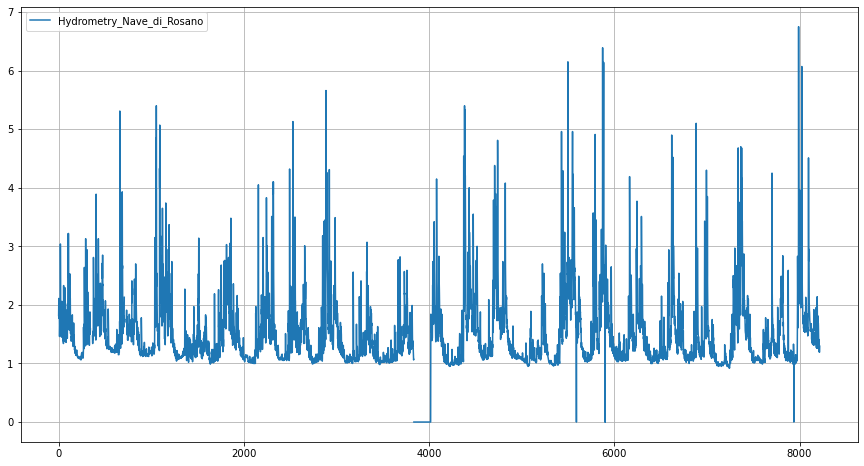

In [4]:
plt.figure(figsize=(15,8))
plt.plot(data_ra["Hydrometry_Nave_di_Rosano"])
plt.legend(["Hydrometry_Nave_di_Rosano"])
plt.grid()
plt.show()

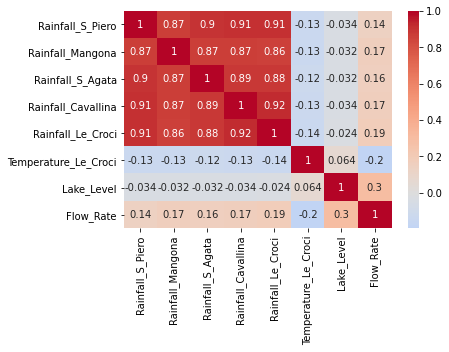

In [23]:
sns.heatmap(data_lb.corr(), annot = True, cmap='coolwarm', center=0)
plt.show()

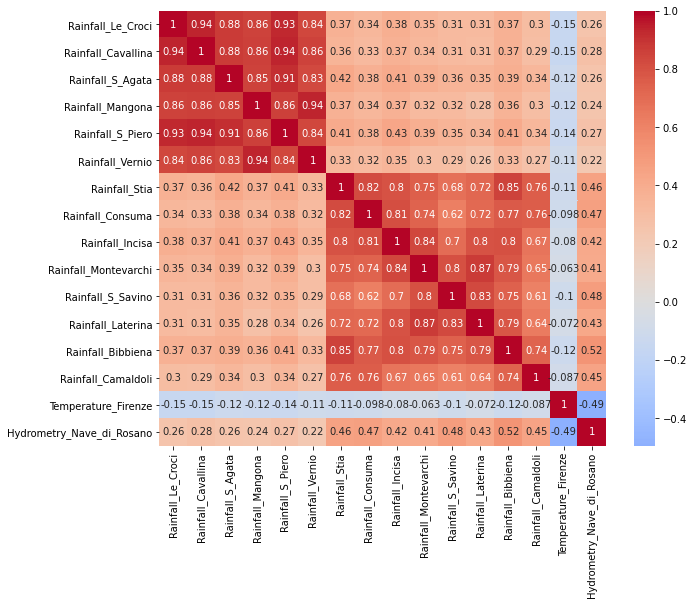

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(data_ra.corr(), annot = True, cmap='coolwarm', center=0)
plt.show()

In [4]:
# Drop rows with NaN value
data_lb.dropna(inplace=True)
display(data_lb.head())
print(data_lb.info())
data_ra.dropna(inplace=True)
display(data_ra.head())
print(data_ra.info())

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
578,02/01/2004,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5
579,03/01/2004,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5
580,04/01/2004,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5
581,05/01/2004,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5
582,06/01/2004,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6025 non-null   object 
 1   Rainfall_S_Piero      6025 non-null   float64
 2   Rainfall_Mangona      6025 non-null   float64
 3   Rainfall_S_Agata      6025 non-null   float64
 4   Rainfall_Cavallina    6025 non-null   float64
 5   Rainfall_Le_Croci     6025 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6025 non-null   float64
 8   Flow_Rate             6025 non-null   float64
dtypes: float64(8), object(1)
memory usage: 470.7+ KB
None


,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
2191,01/01/2004,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,8.65,1.84
2192,02/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,7.10,1.93
2193,03/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.2,0.0,5.50,1.61
2194,04/01/2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.55,1.35
2195,05/01/2004,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,1.44


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1276 entries, 2191 to 3473
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1276 non-null   object 
 1   Rainfall_Le_Croci          1276 non-null   float64
 2   Rainfall_Cavallina         1276 non-null   float64
 3   Rainfall_S_Agata           1276 non-null   float64
 4   Rainfall_Mangona           1276 non-null   float64
 5   Rainfall_S_Piero           1276 non-null   float64
 6   Rainfall_Vernio            1276 non-null   float64
 7   Rainfall_Stia              1276 non-null   float64
 8   Rainfall_Consuma           1276 non-null   float64
 9   Rainfall_Incisa            1276 non-null   float64
 10  Rainfall_Montevarchi       1276 non-null   float64
 11  Rainfall_S_Savino          1276 non-null   float64
 12  Rainfall_Laterina          1276 non-null   float64
 13  Rainfall_Bibbiena          1276 non-null   fl

In [5]:
# Lake Bilancino data split
x = data_lb.drop(["Date", "Lake_Level", "Flow_Rate"], axis=1)
y = data_lb[["Lake_Level", "Flow_Rate"]]
# Split data into train and test sets
X_train = x.iloc[:1000,:]
X_test = x.iloc[1001:,:]
y_train = y.iloc[:1000,:]
y_test = y.iloc[1001:,:]
# Apply MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# River Arno data split
x_ra = data_ra.drop(["Date", "Hydrometry_Nave_di_Rosano"], axis=1)
y_ra = data_ra[["Hydrometry_Nave_di_Rosano"]]
X_train_ra = x_ra.iloc[:1000,:]
X_test_ra = x_ra.iloc[1001:,:]
y_train_ra = y_ra.iloc[:1000,:]
y_test_ra = y_ra.iloc[1001:,:]
scaler = MinMaxScaler()
X_train_scaled_ra = scaler.fit_transform(X_train_ra)
X_test_scaled_ra = scaler.transform(X_test_ra)

In [10]:
# Construct layers for LB data
def mlp_model_lb(optimizer, neurons):
    input_layer = keras.Input(shape=(6,))
    hidden_1 = keras.layers.Dense(neurons, activation = 'relu')(input_layer)
    hidden_2 = keras.layers.Dense(neurons, activation = 'relu')(hidden_1)
    hidden_3 = keras.layers.Dense(neurons, activation = 'relu')(hidden_2)
    output_layer = keras.layers.Dense(2, activation='linear')(hidden_3)
    model_lb = keras.Model(input_layer, output_layer)
    model_lb.compile(optimizer=optimizer, loss="mse", metrics="accuracy", weighted_metrics=['mse'])
    return model_lb

In [7]:
# Construct layers for RA data
def mlp_model_ra(optimizer, neurons):
    input_layer = keras.Input(shape=(15,))
    hidden_1 = keras.layers.Dense(neurons, activation = 'relu')(input_layer)
    output_layer = keras.layers.Dense(1, activation='linear')(hidden_1)
    model_ra = keras.Model(input_layer, output_layer)
    model_ra.compile(optimizer=optimizer, loss="mse", metrics="accuracy", weighted_metrics=['mse'])
    return model_ra

In [29]:
# Hyperparameter tuning for LB data
optimizers = ['adam', 'SGD', 'RMSprop']
neurons = [16, 32]
batches = [16, 32]
epochs = [100, 200]
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=5)
param_grid_lb = dict(batch_size=batches, optimizer=optimizers, epochs=epochs, neurons=neurons)
hp_model_lb = keras.wrappers.scikit_learn.KerasClassifier(build_fn=mlp_model_lb, verbose=0)
grid_lb = GridSearchCV(estimator = hp_model_lb, param_grid = param_grid_lb, n_jobs = 2)
grid_result_lb = grid_lb.fit(X_train_scaled, y_train, callbacks=[early_stopping])
print("Best params (LB): {}".format(grid_result_lb.best_params_))

Best params (LB): {'batch_size': 16, 'epochs': 100, 'neurons': 16, 'optimizer': 'adam'}


In [9]:
# Hyperparameter tuning for RA data
#optimizers = ['adam', 'SGD', 'RMSprop']
optimizers = ['adam']
neurons = [1, 8, 16, 32]
batches = [16, 32]
epochs = [100, 200]
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=5)
param_grid_ra = dict(batch_size=batches, optimizer=optimizers, epochs=epochs, neurons=neurons)
hp_model_ra = keras.wrappers.scikit_learn.KerasClassifier(build_fn=mlp_model_ra, verbose=0)
grid_ra = GridSearchCV(estimator = hp_model_ra, param_grid = param_grid_ra, n_jobs = 2)
grid_result_ra = grid_ra.fit(X_train_scaled_ra, y_train_ra, callbacks=[early_stopping])
print("Best params (RA): {}".format(grid_result_ra.best_params_))

Best params (RA): {'batch_size': 16, 'epochs': 100, 'neurons': 1, 'optimizer': 'adam'}


Epoch 1/100
63/63 [==============================] - 0s 6ms/step - loss: 31407.5098 - accuracy: 0.6110 - mse: 31407.5098 - val_loss: 30976.0547 - val_accuracy: 0.9998 - val_mse: 30976.0547
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 31158.0312 - accuracy: 1.0000 - mse: 31158.0312 - val_loss: 30495.2383 - val_accuracy: 1.0000 - val_mse: 30495.2383
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 30108.5449 - accuracy: 1.0000 - mse: 30108.5449 - val_loss: 28535.5820 - val_accuracy: 1.0000 - val_mse: 28535.5820
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 26580.9043 - accuracy: 1.0000 - mse: 26580.9043 - val_loss: 22905.1250 - val_accuracy: 1.0000 - val_mse: 22905.1250
Epoch 5/100
63/63 [==============================] - 0s 3ms/step - loss: 18533.7402 - accuracy: 1.0000 - mse: 18533.7402 - val_loss: 12413.2432 - val_accuracy: 1.0000 - val_mse: 12413.2432
Epoch 6/100
63/63 [==============================] - 0s

Epoch 45/100
63/63 [==============================] - 0s 3ms/step - loss: 13.3052 - accuracy: 1.0000 - mse: 13.3052 - val_loss: 12.7438 - val_accuracy: 1.0000 - val_mse: 12.7438
Epoch 46/100
63/63 [==============================] - 0s 3ms/step - loss: 13.2566 - accuracy: 1.0000 - mse: 13.2566 - val_loss: 12.9220 - val_accuracy: 1.0000 - val_mse: 12.9220
Epoch 47/100
63/63 [==============================] - 0s 4ms/step - loss: 13.2360 - accuracy: 1.0000 - mse: 13.2360 - val_loss: 13.6921 - val_accuracy: 1.0000 - val_mse: 13.6921
Epoch 48/100
63/63 [==============================] - 0s 4ms/step - loss: 13.1772 - accuracy: 1.0000 - mse: 13.1772 - val_loss: 13.6250 - val_accuracy: 1.0000 - val_mse: 13.6250
Epoch 49/100
63/63 [==============================] - 0s 3ms/step - loss: 13.1488 - accuracy: 1.0000 - mse: 13.1488 - val_loss: 13.4770 - val_accuracy: 1.0000 - val_mse: 13.4770
Epoch 50/100
63/63 [==============================] - 0s 3ms/step - loss: 13.1923 - accuracy: 1.0000 - mse: 13

63/63 [==============================] - 0s 3ms/step - loss: 12.1063 - accuracy: 1.0000 - mse: 12.1063 - val_loss: 11.7865 - val_accuracy: 1.0000 - val_mse: 11.7865
Epoch 92/100
63/63 [==============================] - 0s 3ms/step - loss: 12.1686 - accuracy: 1.0000 - mse: 12.1686 - val_loss: 12.0025 - val_accuracy: 1.0000 - val_mse: 12.0025
Epoch 93/100
63/63 [==============================] - 0s 3ms/step - loss: 12.2295 - accuracy: 1.0000 - mse: 12.2295 - val_loss: 12.2023 - val_accuracy: 1.0000 - val_mse: 12.2023
Epoch 94/100
63/63 [==============================] - 0s 2ms/step - loss: 12.0806 - accuracy: 1.0000 - mse: 12.0806 - val_loss: 11.9760 - val_accuracy: 1.0000 - val_mse: 11.9760
Epoch 95/100
63/63 [==============================] - 0s 4ms/step - loss: 12.1032 - accuracy: 1.0000 - mse: 12.1032 - val_loss: 11.0909 - val_accuracy: 1.0000 - val_mse: 11.0909
Epoch 96/100
63/63 [==============================] - 0s 3ms/step - loss: 12.1380 - accuracy: 1.0000 - mse: 12.1380 - val_l

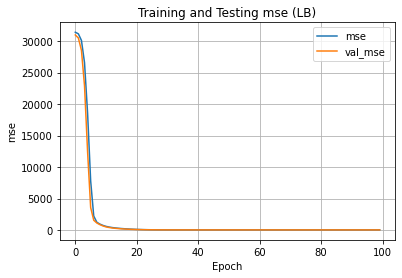

In [22]:
# MLP MSE plot for LB with best_params
hist = mlp_model_lb('adam', 16).fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, batch_size=16, callbacks=early_stopping, verbose=1)
print("Best mse (LB): {}".format(min(hist.history['mse'])))
print("Best validation mse (LB): {}".format(min(hist.history['val_mse'])))
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Training and Testing mse (LB)')
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.legend(['mse','val_mse'])
plt.grid()
plt.show()

Epoch 1/100
63/63 [==============================] - 0s 3ms/step - loss: 2.1742 - accuracy: 0.0000e+00 - mse: 2.1742 - val_loss: 1.0813 - val_accuracy: 0.0000e+00 - val_mse: 1.0813
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 1.4396 - accuracy: 0.0040 - mse: 1.4396 - val_loss: 0.5069 - val_accuracy: 0.0145 - val_mse: 0.5069
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.7576 - accuracy: 0.0050 - mse: 0.7576 - val_loss: 0.2041 - val_accuracy: 0.0145 - val_mse: 0.2041
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4838 - accuracy: 0.0050 - mse: 0.4838 - val_loss: 0.1681 - val_accuracy: 0.0145 - val_mse: 0.1681
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.0050 - mse: 0.4218 - val_loss: 0.1675 - val_accuracy: 0.0145 - val_mse: 0.1675
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.3971 - accuracy: 0.0050 - mse: 0.3971 - val_loss: 0.

63/63 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.0050 - mse: 0.1579 - val_loss: 0.1338 - val_accuracy: 0.0145 - val_mse: 0.1338
Epoch 94/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1578 - accuracy: 0.0050 - mse: 0.1578 - val_loss: 0.1343 - val_accuracy: 0.0145 - val_mse: 0.1343
Epoch 95/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1576 - accuracy: 0.0050 - mse: 0.1576 - val_loss: 0.1284 - val_accuracy: 0.0145 - val_mse: 0.1284
Epoch 96/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1577 - accuracy: 0.0050 - mse: 0.1577 - val_loss: 0.1303 - val_accuracy: 0.0145 - val_mse: 0.1303
Epoch 97/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1574 - accuracy: 0.0050 - mse: 0.1574 - val_loss: 0.1305 - val_accuracy: 0.0145 - val_mse: 0.1305
Epoch 98/100
63/63 [==============================] - 0s 1ms/step - loss: 0.1572 - accuracy: 0.0050 - mse: 0.1572 - val_loss: 0.1403 - val_accu

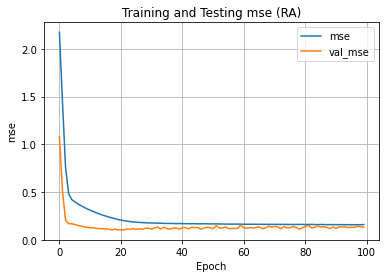

In [28]:
# MLP MSE plot for RA with best_params
hist = mlp_model_ra('adam', 8).fit(X_train_scaled_ra, y_train_ra, validation_data=(X_test_scaled_ra, y_test_ra), epochs=100, batch_size=16, callbacks=early_stopping, verbose=1)
print("Best mse: {}".format(min(hist.history['mse'])))
print("Best validation mse: {}".format(min(hist.history['val_mse'])))
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.title('Training and Testing mse (RA)')
plt.xlabel('Epoch')
plt.ylabel('mse')
plt.legend(['mse','val_mse'])
plt.grid()
plt.show()

,0,1
0,250.790176,2.866021
1,250.826065,2.977498
2,250.807251,2.919103
3,250.757645,2.765159
4,250.750778,2.743928
...,...,...
5019,250.665283,2.478505
5020,250.634476,2.382957
5021,250.699509,2.584672
5022,250.641327,2.404191


,Lake_Level,Flow_Rate
0,248.08,2.5
1,248.03,2.4
2,247.97,2.4
3,247.94,2.4
4,247.91,2.4
...,...,...
5019,250.85,0.6
5020,250.84,0.6
5021,250.83,0.6
5022,250.82,0.6


MSE: 11.855418


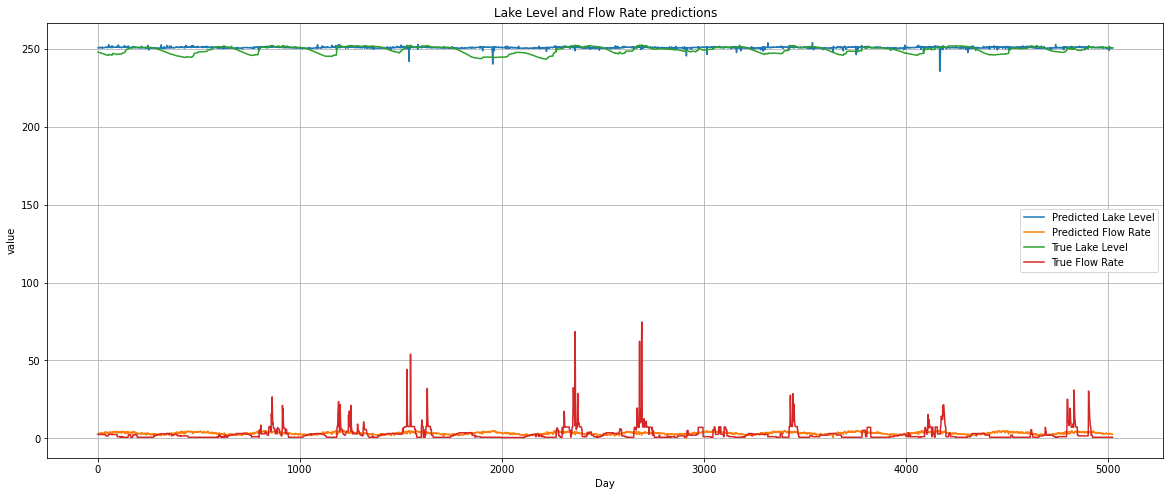

In [30]:
# Predictions for LB
y_pred = grid_lb.best_estimator_.model.predict(X_test_scaled)
y_pred = pd.DataFrame(y_pred)
display(y_pred)
y_test_display = pd.DataFrame.reset_index(y_test).drop(["index"], axis=1)
display(y_test_display)
plt.figure(figsize=(20,8))
plt.plot(y_pred)
plt.plot(y_test_display)
print("MSE: %f" %(sklearn.metrics.mean_squared_error(y_test_display, y_pred)))
plt.title('Lake Level and Flow Rate predictions')
plt.xlabel('Day')
plt.ylabel('value')
plt.legend(['Predicted Lake Level','Predicted Flow Rate', 'True Lake Level','True Flow Rate'])
plt.grid()
plt.show()

,0
0,31.421055
1,26.265108
2,24.222866
3,22.290083
4,30.111910
...,...
270,22.418310
271,24.085258
272,27.946844
273,27.290924


,Hydrometry_Nave_di_Rosano
0,1.06
1,1.08
2,1.08
3,1.09
4,1.07
...,...
270,0.99
271,1.01
272,1.03
273,1.02


MSE: 2854.170759


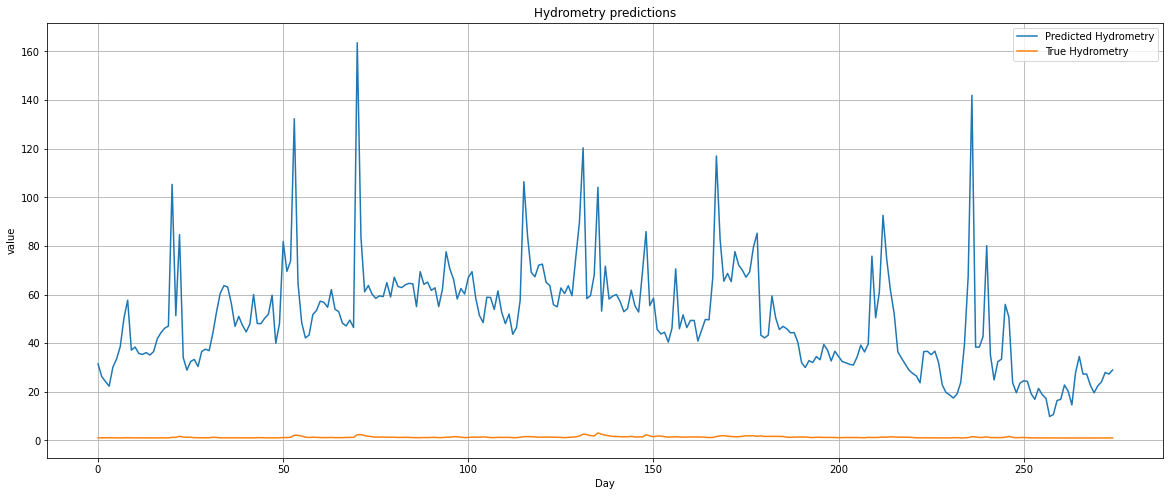

In [43]:
# Predictions for RA
y_pred_ra = grid_ra.best_estimator_.model.predict(X_test_scaled_ra)
y_pred_ra = pd.DataFrame(y_pred_ra)
display(y_pred_ra)
y_test_display_ra = pd.DataFrame.reset_index(y_test_ra).drop(["index"], axis=1)
display(y_test_display_ra)
plt.figure(figsize=(20,8))
plt.plot(y_pred_ra)
plt.plot(y_test_display_ra)
print("MSE: %f" %(sklearn.metrics.mean_squared_error(y_test_display_ra, y_pred_ra)))
plt.title('Hydrometry predictions')
plt.xlabel('Day')
plt.ylabel('value')
plt.legend(['Predicted Hydrometry','True Hydrometry'])
plt.grid()
plt.show()